<a href="https://colab.research.google.com/github/aymen-cyber/colab_test/blob/main/Step1_ImageProccessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Type something here
- I am ready Anouar

In [ ]:
# download coco dataset with annotations
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip -d /content/PythonAPI

--2021-10-15 12:42:29--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.12.124
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.12.124|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  96.4MB/s    in 2.5s    

2021-10-15 12:42:31 (96.4 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: /content/PythonAPI/annotations/instances_train2017.json  
  inflating: /content/PythonAPI/annotations/instances_val2017.json  
  inflating: /content/PythonAPI/annotations/captions_train2017.json  
  inflating: /content/PythonAPI/annotations/captions_val2017.json  
  inflating: /content/PythonAPI/annotations/person_keypoints_train2017.json  
  inflating: /content/PythonAPI/

In [ ]:
# Some importation
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
# initialisation of the directory path
dataDir='PythonAPI'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [ ]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=19.04s)
creating index...
index created!
loading annotations into memory...
Done (t=1.00s)
creating index...
index created!


In [ ]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
sports animal accessory furniture electronic kitchen indoor appliance vehicle food person outdoor


In [ ]:
#get images
def load_images(imgIds,nbr):
  # imgIds = coco.getImgIds(imgIds = [324158])
  img=[]
  if nbr>len(imgIds):
    nbr=len(imgIds)
  for i in range(nbr):
    img.append(coco.loadImgs(imgIds[i])[0])
  return(img)

In [ ]:
#get annotation
def load_ann(img):
  annIds = coco_caps.getAnnIds(imgIds=img['id'])
  anns = coco_caps.loadAnns(annIds)
  text=''
  for i in anns:
    text=text+i["caption"]+'\n'
  return(text.strip())

In [ ]:
# load and display instance annotations
def load_bbox(img):
  annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
  anns = coco.loadAnns(annIds)
  return anns

In [ ]:
# display image with bbox
def display_img(img, anns):
  print(anns[0]["bbox"])
  I = io.imread(img['coco_url'])
  plt.axis('off')
  plt.imshow(I)
  coco.showAnns(anns)
  plt.show()  

In [ ]:
#resize image
def resizingImg(img, bbox, size=(64,64)):
  from PIL import Image
  im = Image.fromarray(img)
  width, height= im.size

  # create coordonate of the bbox
  R = int(np.maximum(bbox[2], bbox[3]) * 0.75)
  center_x = int((2 * bbox[0] + bbox[2]) / 2)
  center_y = int((2 * bbox[1] + bbox[3]) / 2)
  y1 = np.maximum(0, center_y - R)
  y2 = np.minimum(height, center_y + R)
  x1 = np.maximum(0, center_x - R)
  x2 = np.minimum(width, center_x + R)

  # making the image smaller
  img = im.crop([x1, y1, x2, y2])

  # resize the image
  im1 = img.resize(size)
  im1=np.array(im1)
  return(im1)

In [ ]:
def save_rgb_img(img, path):
    """
    Save an rgb image
    """
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(img)
    ax.axis("off")

    plt.savefig(path)
    plt.close()

In [ ]:
# all you need
def return_all_u_need(img, size):
  imgann= load_ann(img)
  imgsized= resizingImg(io.imread(img['coco_url']), load_bbox(img)[0]["bbox"], size)
  id= img['id']
  return id, imgsized, imgann

In [ ]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['cat'])
imgIds = coco.getImgIds(catIds=catIds )
nbrImg= 4114
size= (64,64)
type(imgIds)

list

In [ ]:
images=load_images(imgIds, nbrImg)
print(images)
# for i in images:
#   I = io.imread(i['coco_url'])
#   plt.axis('off')
#   plt.imshow(I)
#   plt.show()  

[{'license': 1, 'file_name': '000000286720.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000286720.jpg', 'height': 640, 'width': 480, 'date_captured': '2013-11-15 05:35:24', 'flickr_url': 'http://farm4.staticflickr.com/3386/3346836280_ac5303bd50_z.jpg', 'id': 286720}, {'license': 2, 'file_name': '000000073729.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000073729.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-18 00:35:46', 'flickr_url': 'http://farm1.staticflickr.com/130/321307778_7ac99d2f59_z.jpg', 'id': 73729}, {'license': 6, 'file_name': '000000417802.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000417802.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-18 00:13:54', 'flickr_url': 'http://farm3.staticflickr.com/2150/2315944388_e2e1755ee3_z.jpg', 'id': 417802}, {'license': 1, 'file_name': '000000229387.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000229387.jpg', 'height': 481, 'width': 640, '

In [ ]:
for i in images:
  print(load_ann(i),end="\n\n")

A cat that is sitting on a toilet seat.
A black cat is drinking from the toilet.
A cat is standing on the rim of a toilet.
there is a black cat that is standing on a toilet
a cat on a toilet looking in the bowl

A cat lying between a computer keyboard and monitor. 
A cat falling asleep between a computer and its keyboard.
A black cat with yellow eyes near a keyboard.
The cat is laying next to the computer keyboard.
A sad looking cat lays next to a keyboard.

A black cat sitting on top of a laptop computer.
A cat sits on top of a laptop computer.
A cat sitting on a laptop that is sitting on a desk
a black cat is sitting on a computer desk
a cat that is sitting on a desk next to a computer



A cat that is sitting on a toilet seat.
A black cat is drinking from the toilet.
A cat is standing on the rim of a toilet.
there is a black cat that is standing on a toilet
a cat on a toilet looking in the bowl

[176.17, 181.68, 199.57, 181.67]


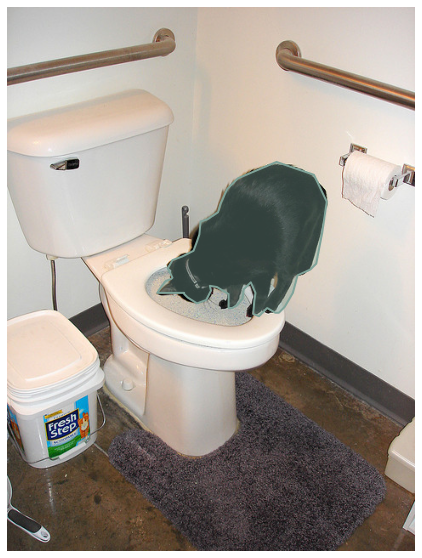

A cat lying between a computer keyboard and monitor. 
A cat falling asleep between a computer and its keyboard.
A black cat with yellow eyes near a keyboard.
The cat is laying next to the computer keyboard.
A sad looking cat lays next to a keyboard.

[0.92, 0.92, 560.15, 280.99]


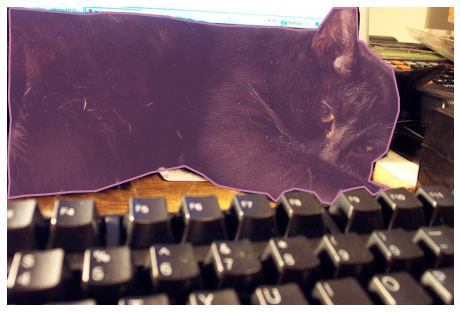

A black cat sitting on top of a laptop computer.
A cat sits on top of a laptop computer.
A cat sitting on a laptop that is sitting on a desk
a black cat is sitting on a computer desk
a cat that is sitting on a desk next to a computer

[238.44, 64.02, 220.83, 325.53]


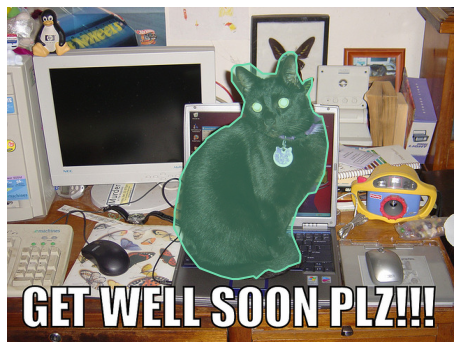

An unhappy cat wearing a puffy pink beanie
The black and white cat is wearing a pink hat. 
A black and white cat with a pink hat on.
A tuxedo cat is wearing a pink knitted hat.
A black and white cat wearing a pink hat

[40.17, 181.96, 599.83, 251.32]


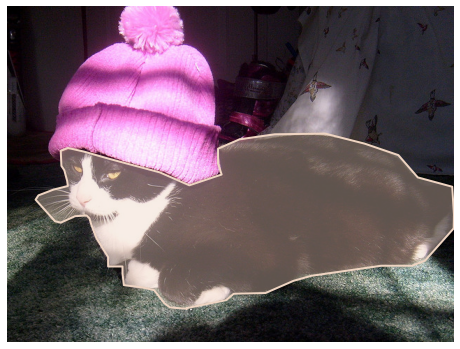

The cat is standing by the window in the home.
THIS IS A STILL SHOT PICTURE  OF A GREY ADULT CAT
A close up view of a very cute small cat.
The cat is looking in to the window. 
A gray cat with big gray eyes staring straight ahead.

[150.27, 38.48, 338.12, 383.02]


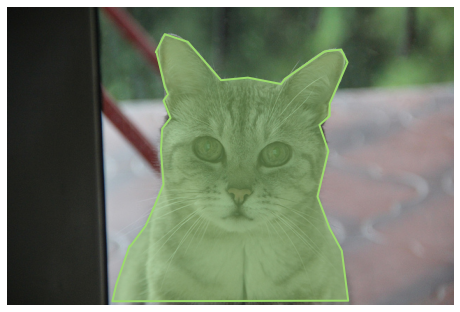

A cat sitting on a couch next to a glass table.
A view of a glass coffee table from a person in a chair.
A cat is sitting by a person on a couch.
A cat sitting on someone's lap staring at the person.
A large cat is sitting on its owner's lap.

[1.08, 232.26, 305.37, 260.21]


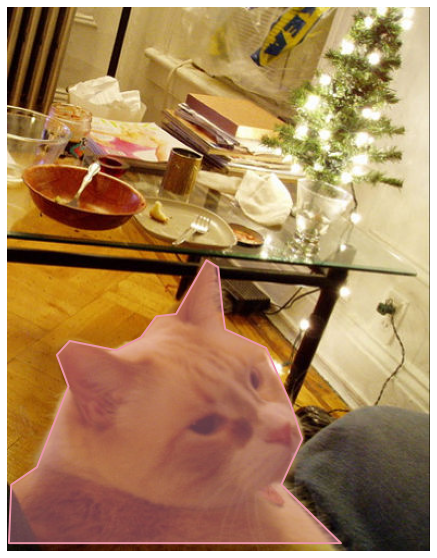

In [ ]:
for i in images:
  print(load_ann(i),end="\n\n")
  display_img(i, load_bbox(i))

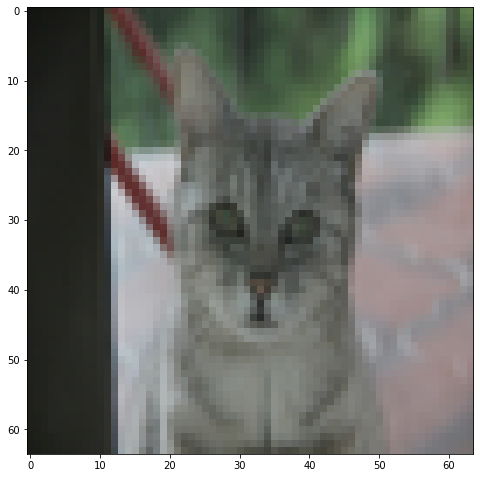

In [ ]:
# load_ann(images[4])
myimg= resizingImg(io.imread(images[4]['coco_url']), load_bbox(images[4])[0]["bbox"], (64,64))
plt.imshow(myimg)
plt.show()

In [ ]:
dic={}
for i in images:
  id, imgsized, imgann= return_all_u_need(i, size)
  dic[id]={"text": imgann, "image": imgsized}

In [ ]:
for i,j in dic.items():
  path= "/content/images/image{}.png".format(i)
  save_rgb_img(j['image'], path)

In [ ]:
for i,j in dic.items():
  print(i)
  print(j)

In [ ]:
len(dic)

4114